In [1]:
import pandas as pd

# Load the datasets
math_df = pd.read_csv('student_math_copy.csv')
port_df = pd.read_csv('student_portuguese_copy.csv')

# Display basic information about both datasets
print("Mathematics Dataset Info:")
print(math_df.info())
print("\nFirst few rows of Mathematics dataset:")
print(math_df.head())

print("\n" + "="*50 + "\n")

print("Portuguese Dataset Info:")
print(port_df.info())
print("\nFirst few rows of Portuguese dataset:")
print(port_df.head())

# Get column names for both datasets
print("\nMath dataset columns:")
print(math_df.columns.tolist())
print("\nPortuguese dataset columns:")
print(port_df.columns.tolist())

Mathematics Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null

In [2]:
# Combine both subjects into one dataset with a subject identifier
math_df['subject'] = 'math'
port_df['subject'] = 'portuguese'
combined_df = pd.concat([math_df, port_df])

# Calculate average final grade (G3) by parents' education level
analysis = combined_df.groupby(['Medu', 'Fedu'])['G3'].agg(['mean', 'count']).round(2)
analysis

mean  count
Medu Fedu              
0    0     11.00      1
     1     10.00      3
     2     13.60      5
1    0     13.17      6
     1      9.95    129
     2     10.63     51
     3      9.23     13
     4     10.67      3
2    1     10.51     80
     2     10.84    152
     3     11.64     42
     4     12.93     15
3    1     11.51     35
     2     11.29     70
     3     11.16     92
     4     11.15     41
4    0     10.50      2
     1     10.78      9
     2     12.96     46
     3     12.52     84
     4     12.50    165

In [3]:
combined_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,math
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,portuguese
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,portuguese
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,portuguese
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,portuguese


In [4]:
background_features = ['Medu', 'Fedu', 'Mjob', 'Fjob', 'address', 
                      'guardian', 'Pstatus', 'sex', 'age', 'G3']

background_df = combined_df[background_features]
background_df.head()

,Medu,Fedu,Mjob,Fjob,address,guardian,Pstatus,sex,age,G3
0,4,4,at_home,teacher,U,mother,A,F,18,6
1,1,1,at_home,other,U,father,T,F,17,6
2,1,1,at_home,other,U,mother,T,F,15,10
3,4,2,health,services,U,mother,T,F,15,15
4,3,3,other,other,U,father,T,F,16,10


In [5]:
# Create two separate binary variables for parents' jobs
encoded_df = background_df.copy()

# Mother's job: 1 if teacher, 0 otherwise
encoded_df['mother_teacher'] = (encoded_df['Mjob'] == 'teacher').astype(int)

# Father's job: 1 if teacher, 0 otherwise
encoded_df['father_teacher'] = (encoded_df['Fjob'] == 'teacher').astype(int)

# Guardian: mother(0), father(1), other(2)
encoded_df['guardian_type'] = encoded_df['guardian'].map({
    'mother': 0,
    'father': 1,
    'other': 2
})

# Address: urban (1) or rural (0)
encoded_df['urban'] = (encoded_df['address'] == 'U').astype(int)

# Select final columns
final_df = encoded_df[['age', 'sex', 'Medu', 'Fedu', 'urban',
                      'mother_teacher', 'father_teacher', 
                      'guardian_type', 'G3']]


In [6]:
final_df

,age,sex,Medu,Fedu,urban,mother_teacher,father_teacher,guardian_type,G3
0,18,F,4,4,1,0,1,0,6
1,17,F,1,1,1,0,0,1,6
2,15,F,1,1,1,0,0,0,10
3,15,F,4,2,1,0,0,0,15
4,16,F,3,3,1,0,0,1,10
...,...,...,...,...,...,...,...,...,...
644,19,F,2,3,0,0,0,0,10
645,18,F,3,1,1,1,0,0,16
646,18,F,1,1,1,0,0,0,9
647,17,M,3,1,1,0,0,0,10


In [7]:
# Encode sex (F = 0, M = 1)
final_df['sex'] = (final_df['sex'] == 'M').astype(int)

# Now calculate correlations
correlations = final_df.corr()['G3'].sort_values(ascending=False)
print("Correlations with Final Grade (G3):")
print(correlations)

Correlations with Final Grade (G3):
G3                1.000000
Medu              0.201472
Fedu              0.159796
urban             0.117696
father_teacher    0.101361
mother_teacher    0.084521
sex              -0.031472
guardian_type    -0.044226
age              -0.125282
Name: G3, dtype: float64


C:\Users\mourl\anaconda3\envs\rstudio\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
# Start fresh with our background_df
encoded_df = background_df.copy()

# Parent Jobs encoding (create 3 columns)
encoded_df['mother_teacher'] = (encoded_df['Mjob'] == 'teacher').astype(int)
encoded_df['father_teacher'] = (encoded_df['Fjob'] == 'teacher').astype(int)
encoded_df['other_job'] = ((encoded_df['Mjob'] != 'teacher') & (encoded_df['Fjob'] != 'teacher')).astype(int)

# Guardian encoding (create 3 columns)
encoded_df['father_guardian'] = (encoded_df['guardian'] == 'father').astype(int)
encoded_df['mother_guardian'] = (encoded_df['guardian'] == 'mother').astype(int)
encoded_df['other_guardian'] = (encoded_df['guardian'] == 'other').astype(int)

# Sex and Urban encoding
encoded_df['sex'] = (encoded_df['sex'] == 'M').astype(int)
encoded_df['urban'] = (encoded_df['address'] == 'U').astype(int)

# Select final columns
final_df = encoded_df[['age', 'sex', 'Medu', 'Fedu', 'urban',
                      'mother_teacher', 'father_teacher', 'other_job',
                      'father_guardian', 'mother_guardian', 'other_guardian',
                      'G3']]

#

Correlations with Final Grade (G3):
G3                 1.000000
Medu               0.201472
Fedu               0.159796
urban              0.117696
father_teacher     0.101361
mother_teacher     0.084521
father_guardian    0.042778
mother_guardian    0.009746
sex               -0.031472
other_guardian    -0.088445
other_job         -0.095981
age               -0.125282
Name: G3, dtype: float64


In [ ]:
 #Calculate correlations
correlations = final_df.corr()['G3'].sort_values(ascending=False)
print("Correlations with Final Grade (G3):")
print(correlations)

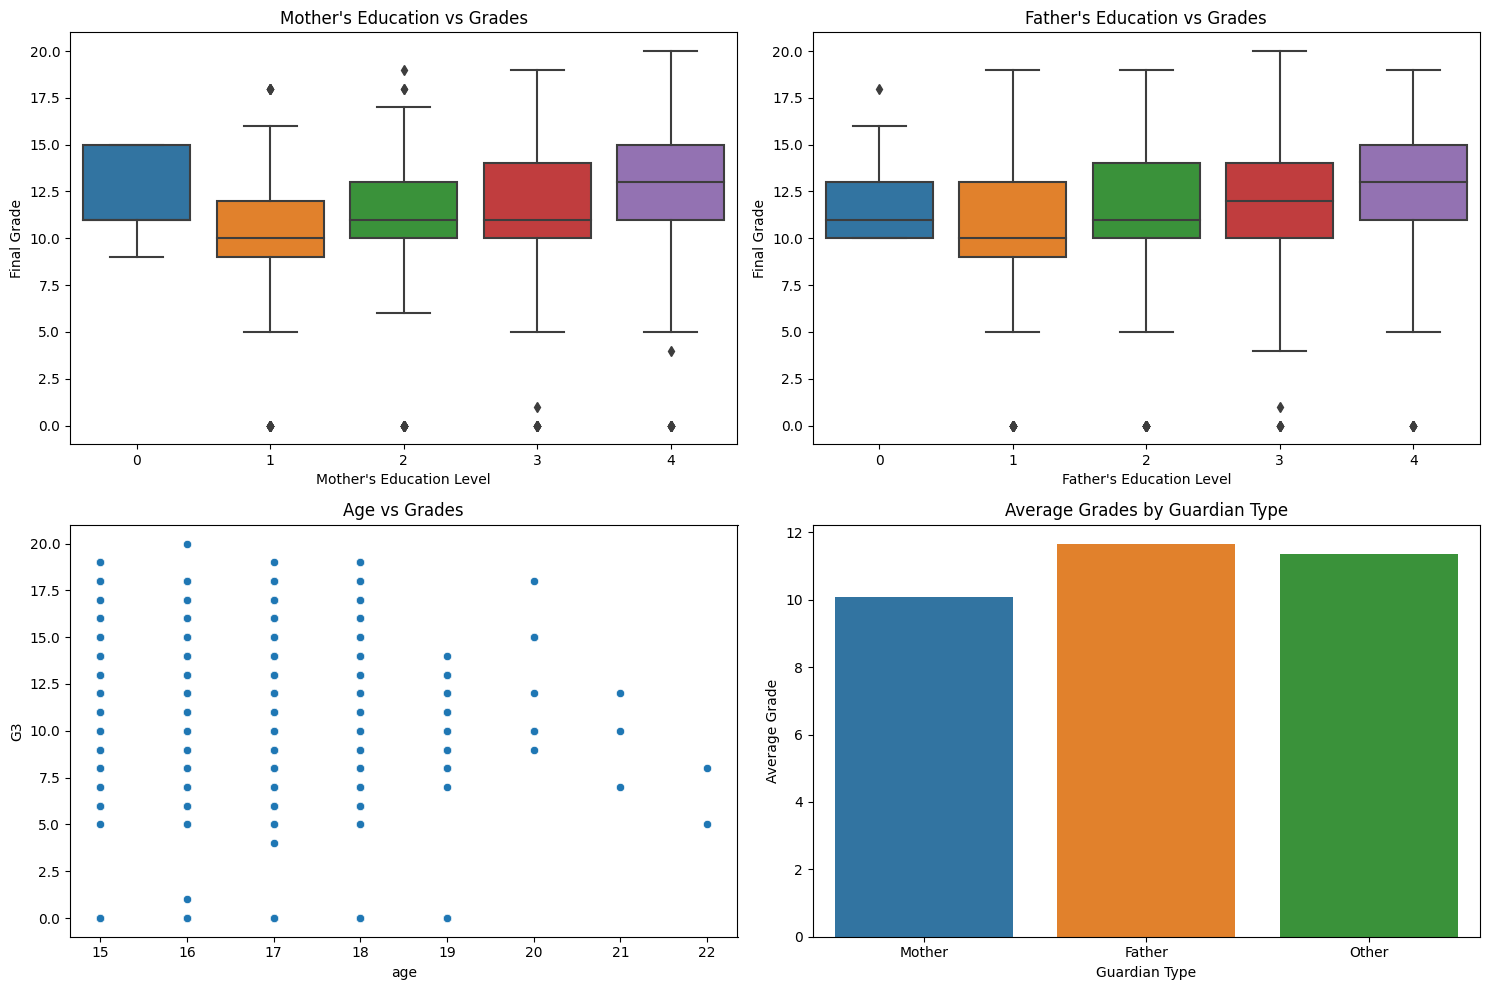

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with multiple subplots
plt.figure(figsize=(15, 10))

# 1. Parents' Education vs Grades (boxplot)
plt.subplot(2, 2, 1)
sns.boxplot(x='Medu', y='G3', data=final_df)
plt.title("Mother's Education vs Grades")
plt.xlabel("Mother's Education Level")
plt.ylabel("Final Grade")

plt.subplot(2, 2, 2)
sns.boxplot(x='Fedu', y='G3', data=final_df)
plt.title("Father's Education vs Grades")
plt.xlabel("Father's Education Level")
plt.ylabel("Final Grade")

# 2. Age vs Grades (scatter plot)
plt.subplot(2, 2, 3)
sns.scatterplot(x='age', y='G3', data=final_df)
plt.title('Age vs Grades')

# 3. Average grades by guardian type (bar plot)
plt.subplot(2, 2, 4)
guardian_grades = final_df.groupby(['mother_guardian', 'father_guardian', 'other_guardian'])['G3'].mean().reset_index()
sns.barplot(x=['Mother', 'Father', 'Other'], y=guardian_grades['G3'])
plt.title('Average Grades by Guardian Type')
plt.xlabel('Guardian Type')
plt.ylabel('Average Grade')

plt.tight_layout()
plt.show()

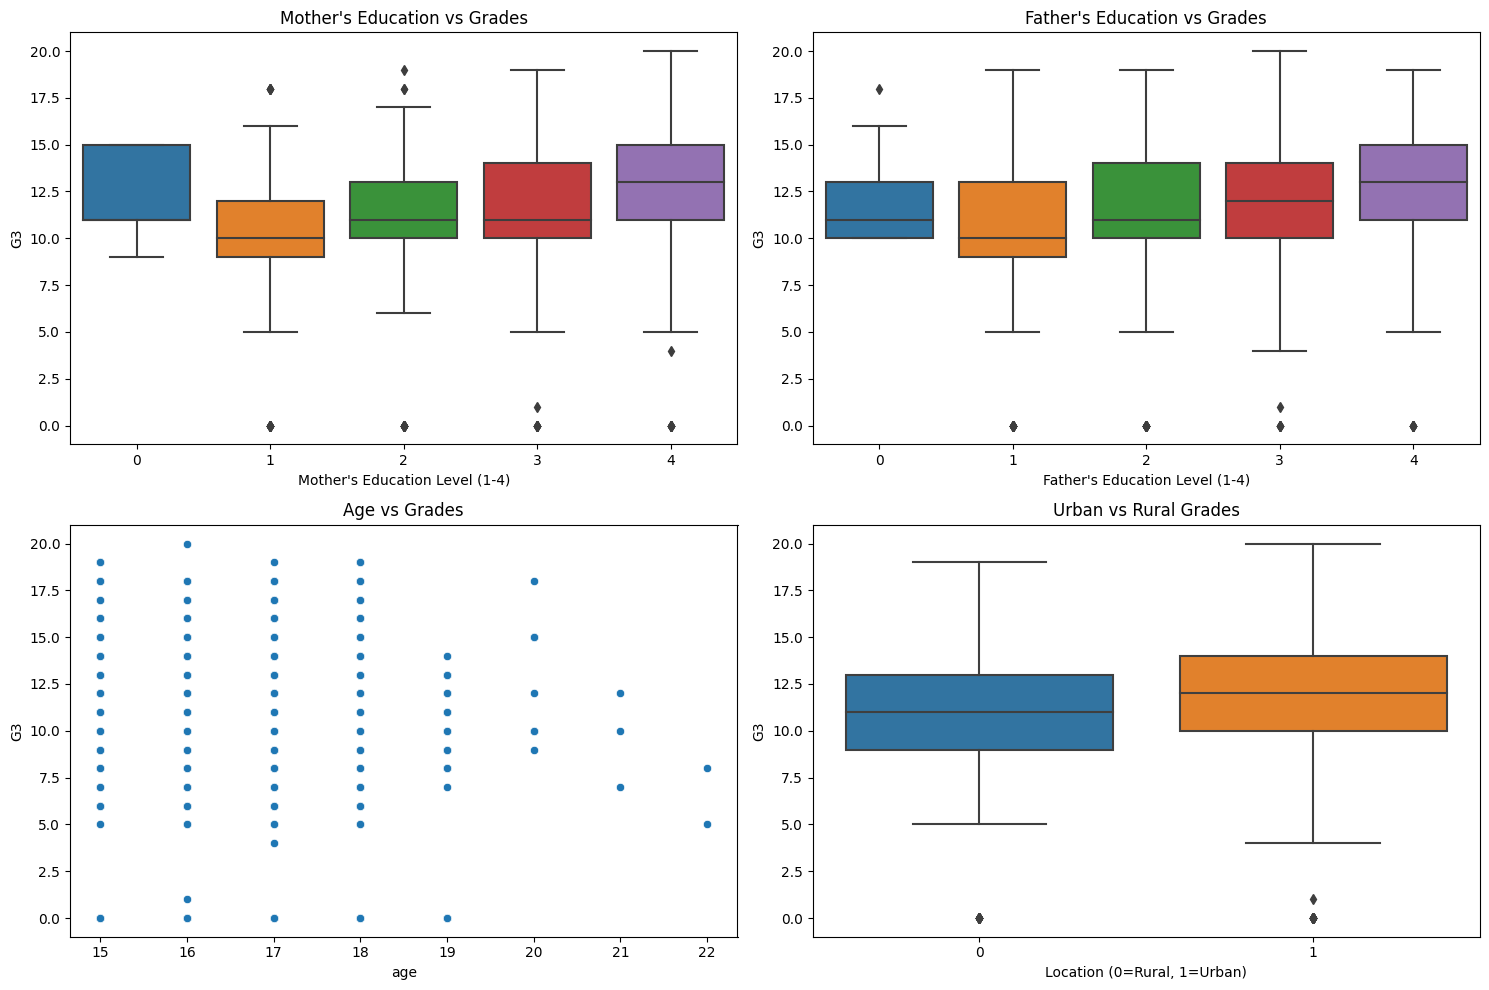

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with subplots focusing on key background factors
plt.figure(figsize=(15, 10))

# 1. Parents' Education vs Grades
plt.subplot(2, 2, 1)
sns.boxplot(x='Medu', y='G3', data=final_df)
plt.title("Mother's Education vs Grades")
plt.xlabel("Mother's Education Level (1-4)")

plt.subplot(2, 2, 2)
sns.boxplot(x='Fedu', y='G3', data=final_df)
plt.title("Father's Education vs Grades")
plt.xlabel("Father's Education Level (1-4)")

# 2. Age vs Grades
plt.subplot(2, 2, 3)
sns.scatterplot(x='age', y='G3', data=final_df)
plt.title('Age vs Grades')

# 3. Urban/Rural comparison
plt.subplot(2, 2, 4)
sns.boxplot(x='urban', y='G3', data=final_df)
plt.title('Urban vs Rural Grades')
plt.xlabel('Location (0=Rural, 1=Urban)')

plt.tight_layout()
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Prepare features (X) and target (y)
X = final_df.drop('G3', axis=1)
y = final_df['G3']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print model performance
print("Model Performance:")
print(f"R-squared score: {r2_score(y_test, y_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")

# Print feature importance (coefficients)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nFeature Importance:")
print(coefficients)

Model Performance:
R-squared score: 0.040
Root Mean Squared Error: 3.852

Feature Importance:
            Feature   Coefficient
8   father_guardian  1.106024e+14
9   mother_guardian  1.106024e+14
10   other_guardian  1.106024e+14
7         other_job  2.004733e+00
5    mother_teacher  1.732758e+00
6    father_teacher  1.643952e+00
4             urban  8.609849e-01
1               sex -5.718737e-01
2              Medu  4.917720e-01
0               age -3.273696e-01
3              Fedu  1.760609e-01


In [12]:
# Prepare features without redundant variables
X = final_df[['age', 'sex', 'Medu', 'Fedu', 'urban', 
              'mother_teacher', 'father_teacher',  # remove other_job
              'mother_guardian', 'father_guardian'  # remove other_guardian
             ]]
y = final_df['G3']

# Split and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Print results
print("Model Performance:")
print(f"R-squared score: {r2_score(y_test, y_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nFeature Importance:")
print(coefficients)

Model Performance:
R-squared score: 0.040
Root Mean Squared Error: 3.852

Feature Importance:
           Feature  Coefficient
4            urban     0.896321
1              sex    -0.523858
2             Medu     0.472358
6   father_teacher     0.460976
0              age    -0.229572
8  father_guardian     0.221751
3             Fedu     0.185602
7  mother_guardian     0.126225
5   mother_teacher     0.107071


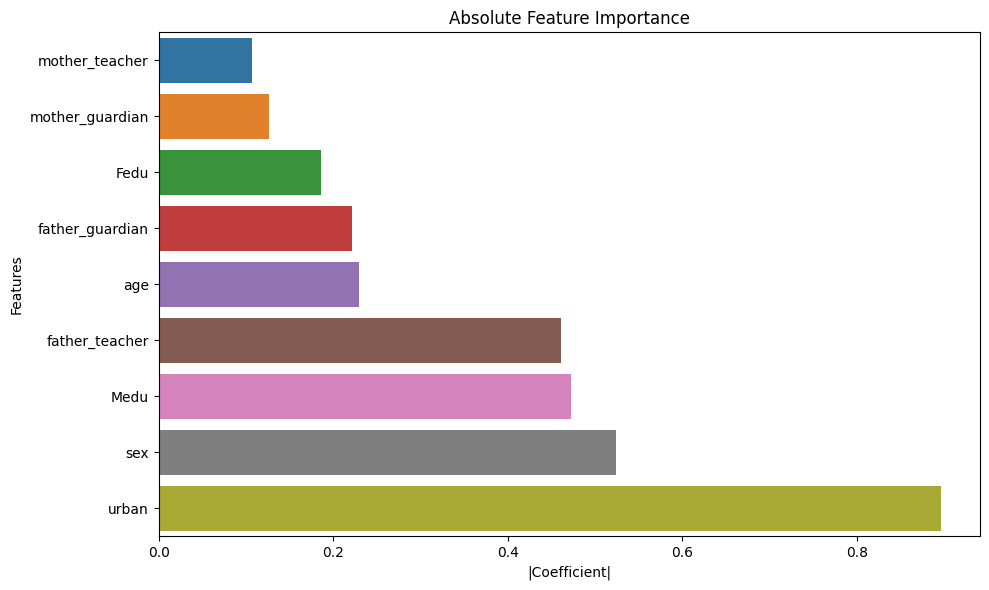

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame with feature importance
importance_df = pd.DataFrame({
   'Feature': X.columns,
   'Coefficient': abs(model.coef_)  # using absolute values for importance
}).sort_values('Coefficient', ascending=True)  # ascending=True to plot from bottom to top

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, y='Feature', x='Coefficient')
plt.title('Absolute Feature Importance')
plt.xlabel('|Coefficient|')
plt.ylabel('Features')

plt.tight_layout()
plt.show()

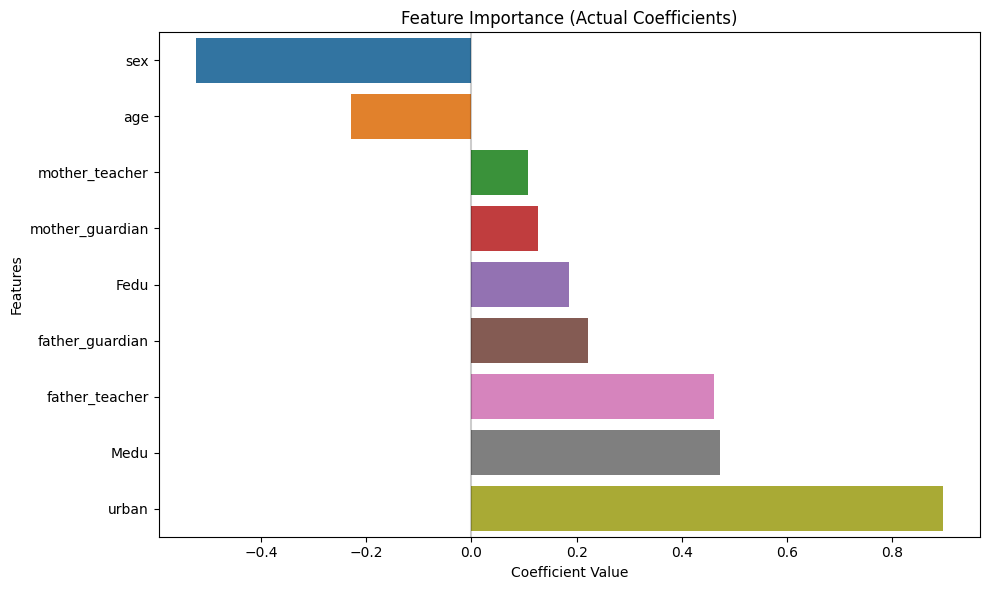

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame with feature importance (using actual coefficients)
importance_df = pd.DataFrame({
   'Feature': X.columns,
   'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=True)  # ascending=True to plot from bottom to top

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, y='Feature', x='Coefficient')
plt.title('Feature Importance (Actual Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

# Add a vertical line at x=0 to better visualize positive/negative effects
plt.axvline(x=0, color='black', linestyle='-', alpha=0.2)

plt.tight_layout()
plt.show()

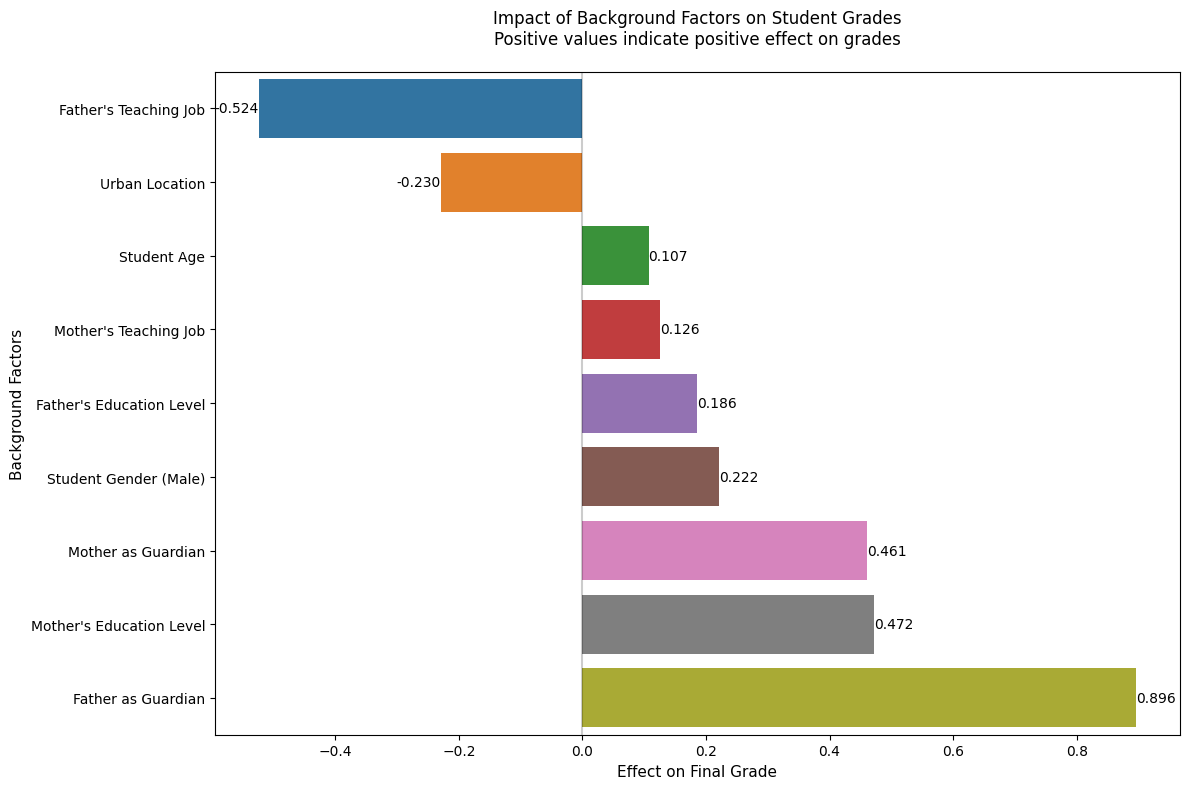

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame with feature importance
importance_df = pd.DataFrame({
   'Feature': ['Urban Location', 
               "Father's Teaching Job",
               "Mother's Education Level",
               "Father's Education Level",
               'Father as Guardian',
               'Student Age',
               'Mother as Guardian',
               "Mother's Teaching Job",
               'Student Gender (Male)'],
   'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=True)

# Create bar plot
plt.figure(figsize=(12, 8))
bars = sns.barplot(data=importance_df, y='Feature', x='Coefficient')

# Add value labels at the end of each bar
for i, bar in enumerate(bars.patches):
   width = bar.get_width()
   plt.text(width, i, f'{width:.3f}', 
            ha='left' if width >= 0 else 'right',
            va='center', fontsize=10)

# Customize plot
plt.title('Impact of Background Factors on Student Grades\nPositive values indicate positive effect on grades', 
         pad=20, fontsize=12)
plt.xlabel('Effect on Final Grade', fontsize=11)
plt.ylabel('Background Factors', fontsize=11)

# Add vertical line at x=0
plt.axvline(x=0, color='black', linestyle='-', alpha=0.2)

plt.tight_layout()
plt.show()

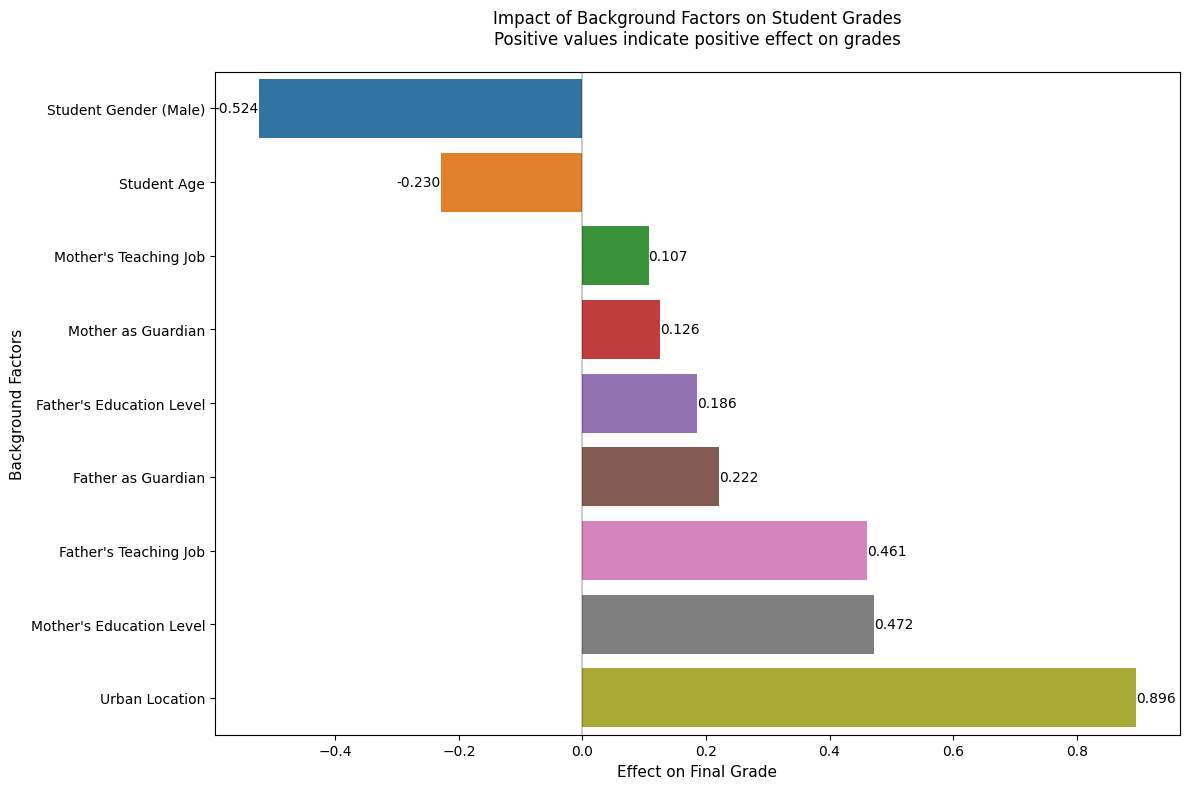

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame with correct feature-coefficient pairs
importance_df = pd.DataFrame({
    'Feature': ['Urban Location', 
                'Student Gender (Male)',
                "Mother's Education Level",
                "Father's Teaching Job",
                'Student Age',
                'Father as Guardian',
                "Father's Education Level",
                'Mother as Guardian',
                "Mother's Teaching Job"],
    'Coefficient': [0.896321, -0.523858, 0.472358, 0.460976, -0.229572,
                   0.221751, 0.185602, 0.126225, 0.107071]
}).sort_values('Coefficient', ascending=True)

# Create bar plot
plt.figure(figsize=(12, 8))
bars = sns.barplot(data=importance_df, y='Feature', x='Coefficient')

# Add value labels at the end of each bar
for i, bar in enumerate(bars.patches):
    width = bar.get_width()
    plt.text(width, i, f'{width:.3f}', 
             ha='left' if width >= 0 else 'right',
             va='center', fontsize=10)

plt.title('Impact of Background Factors on Student Grades\nPositive values indicate positive effect on grades', 
          pad=20, fontsize=12)
plt.xlabel('Effect on Final Grade', fontsize=11)
plt.ylabel('Background Factors', fontsize=11)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.2)

plt.tight_layout()
plt.show()

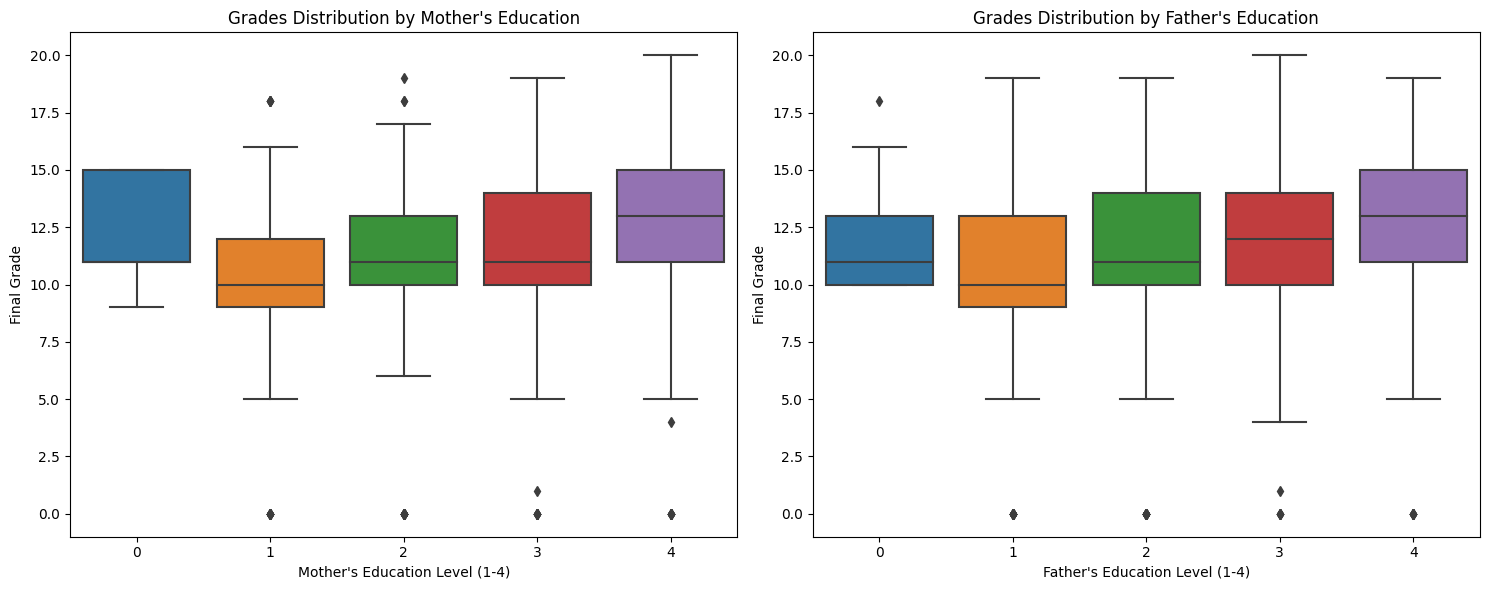

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Mother's education vs grades
sns.boxplot(x='Medu', y='G3', data=final_df, ax=ax1)
ax1.set_title("Grades Distribution by Mother's Education")
ax1.set_xlabel("Mother's Education Level (1-4)")
ax1.set_ylabel("Final Grade")

# Father's education vs grades
sns.boxplot(x='Fedu', y='G3', data=final_df, ax=ax2)
ax2.set_title("Grades Distribution by Father's Education")
ax2.set_xlabel("Father's Education Level (1-4)")
ax2.set_ylabel("Final Grade")

plt.tight_layout()
plt.show()

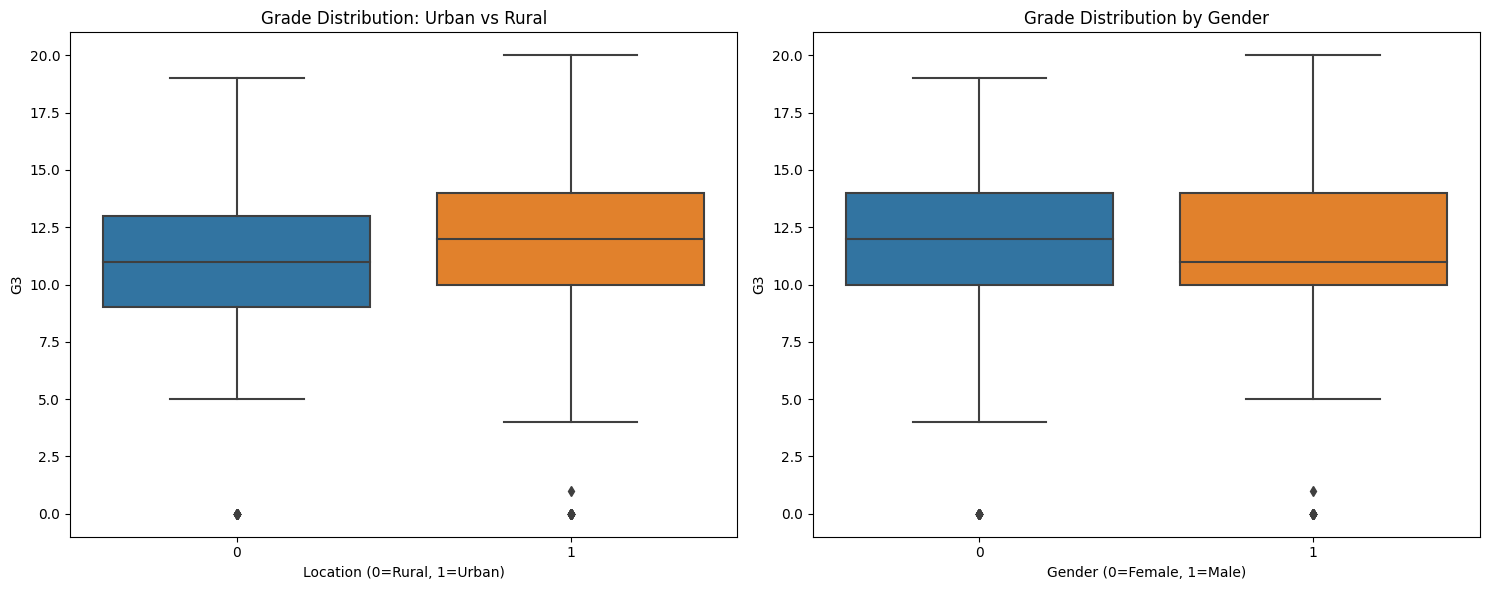

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Urban vs Rural
sns.boxplot(x='urban', y='G3', data=final_df, ax=ax1)
ax1.set_title("Grade Distribution: Urban vs Rural")
ax1.set_xlabel("Location (0=Rural, 1=Urban)")

# Gender comparison
sns.boxplot(x='sex', y='G3', data=final_df, ax=ax2)
ax2.set_title("Grade Distribution by Gender")
ax2.set_xlabel("Gender (0=Female, 1=Male)")

plt.tight_layout()
plt.show()

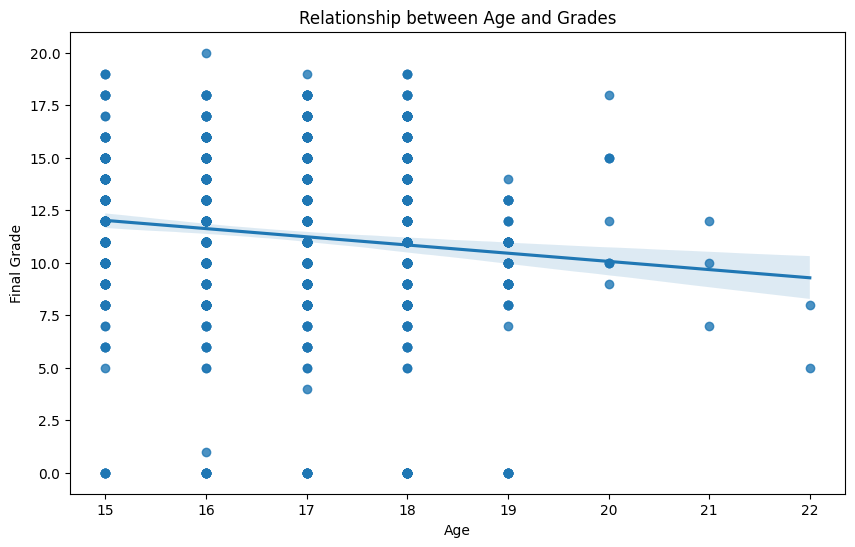

In [19]:
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='G3', data=final_df)
plt.title("Relationship between Age and Grades")
plt.xlabel("Age")
plt.ylabel("Final Grade")
plt.show()

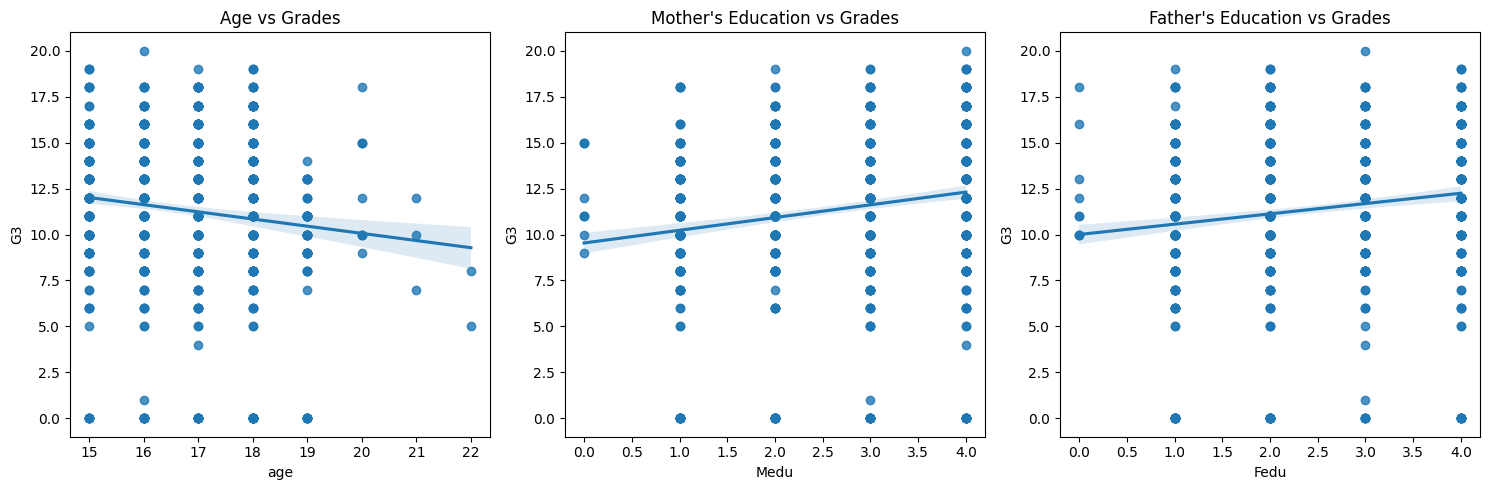

In [20]:
# Create a figure with three subplots
plt.figure(figsize=(15, 5))

# Age vs Grades
plt.subplot(1, 3, 1)
sns.regplot(x='age', y='G3', data=final_df)
plt.title("Age vs Grades")

# Mother's Education vs Grades
plt.subplot(1, 3, 2)
sns.regplot(x='Medu', y='G3', data=final_df)
plt.title("Mother's Education vs Grades")

# Father's Education vs Grades
plt.subplot(1, 3, 3)
sns.regplot(x='Fedu', y='G3', data=final_df)
plt.title("Father's Education vs Grades")

plt.tight_layout()
plt.show()

In [21]:
# Load the dataset
research_df = pd.read_csv('ResearchInformation3.csv')

# Basic exploration
print("Dataset Shape:", research_df.shape)
print("\nColumns:", research_df.columns.tolist())
print("\nFirst few rows:")
print(research_df.head())

# Check data types and missing values
print("\nDataset Info:")
print(research_df.info())

Dataset Shape: (493, 16)

Columns: ['Department', 'Gender', 'HSC', 'SSC', 'Income', 'Hometown', 'Computer', 'Preparation', 'Gaming', 'Attendance', 'Job', 'English', 'Extra', 'Semester', 'Last', 'Overall']

First few rows:
                Department  Gender   HSC   SSC                        Income  \
0  Business Administration    Male  4.17  4.84            Low (Below 15,000)   
1  Business Administration  Female  4.92  5.00  Upper middle (30,000-50,000)   
2  Business Administration    Male  5.00  4.83  Lower middle (15,000-30,000)   
3  Business Administration    Male  4.00  4.50           High (Above 50,000)   
4  Business Administration  Female  2.19  3.17  Lower middle (15,000-30,000)   

  Hometown  Computer        Preparation             Gaming Attendance Job  \
0  Village         3  More than 3 Hours           0-1 Hour   80%-100%  No   
1     City         3           0-1 Hour           0-1 Hour   80%-100%  No   
2  Village         3           0-1 Hour  More than 3 Hours   80%-1

In [22]:
# Create a copy of the dataframe
df_encoded = research_df.copy()

# Encode binary/categorical variables
df_encoded['Gender'] = (df_encoded['Gender'] == 'Male').astype(int)  # Male=1, Female=0
df_encoded['Hometown'] = (df_encoded['Hometown'] == 'City').astype(int)  # City=1, Village=0
df_encoded['Extra'] = (df_encoded['Extra'] == 'Yes').astype(int)  # Yes=1, No=0
df_encoded['Job'] = (df_encoded['Job'] == 'Yes').astype(int)  # Yes=1, No=0

# Encode Income levels
income_map = {
    'Low (Below 15,000)': 0,
    'Lower middle (15,000-30,000)': 1,
    'Upper middle (30,000-50,000)': 2,
    'High (Above 50,000)': 3
}
df_encoded['Income'] = df_encoded['Income'].map(income_map)

# Encode Preparation time
prep_map = {
    '0-1 Hour': 0,
    '2-3 Hours': 1,
    'More than 3 Hours': 2
}
df_encoded['Preparation'] = df_encoded['Preparation'].map(prep_map)

# Encode Gaming time similarly
gaming_map = {
    '0-1 Hour': 0,
    '2-3 Hours': 1,
    'More than 3 Hours': 2
}
df_encoded['Gaming'] = df_encoded['Gaming'].map(gaming_map)

# Convert Attendance to numeric (assuming it's in '80%-100%' format)
df_encoded['Attendance'] = df_encoded['Attendance'].str.split('-').str[1].str.rstrip('%').astype(float)/100

# Print the first few rows to verify encoding
print(df_encoded.head())
print("\nDataset Info after encoding:")
print(df_encoded.info())

                Department  Gender   HSC   SSC  Income  Hometown  Computer  \
0  Business Administration       1  4.17  4.84     0.0         0         3   
1  Business Administration       0  4.92  5.00     2.0         1         3   
2  Business Administration       1  5.00  4.83     1.0         0         3   
3  Business Administration       1  4.00  4.50     3.0         1         5   
4  Business Administration       0  2.19  3.17     1.0         0         3   

   Preparation  Gaming  Attendance  Job  English  Extra Semester   Last  \
0            2       0         1.0    0        3      1      6th  3.220   
1            0       0         1.0    0        3      1      7th  3.467   
2            0       2         1.0    0        4      1      3rd  4.000   
3            2       2         1.0    0        5      1      4th  3.800   
4            0       1         1.0    0        3      1      4th  3.940   

   Overall  
0    3.350  
1    3.467  
2    3.720  
3    3.750  
4    3.940  

D

In [23]:
df_encoded

,Department,Gender,HSC,SSC,Income,Hometown,Computer,Preparation,Gaming,Attendance,Job,English,Extra,Semester,Last,Overall
0,Business Administration,1,4.17,4.84,0.0,0,3,2,0,1.00,0,3,1,6th,3.220,3.350
1,Business Administration,0,4.92,5.00,2.0,1,3,0,0,1.00,0,3,1,7th,3.467,3.467
2,Business Administration,1,5.00,4.83,1.0,0,3,0,2,1.00,0,4,1,3rd,4.000,3.720
3,Business Administration,1,4.00,4.50,3.0,1,5,2,2,1.00,0,5,1,4th,3.800,3.750
4,Business Administration,0,2.19,3.17,1.0,0,3,0,1,1.00,0,3,1,4th,3.940,3.940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Public Health,1,3.50,4.00,1.0,0,2,2,1,0.59,1,2,1,7th,3.250,3.100
489,Public Health,1,4.50,4.00,2.0,1,4,1,1,0.79,0,3,1,9th,3.500,3.670
490,Sociology,0,4.56,3.67,1.0,1,3,0,1,0.59,0,2,0,2nd,3.560,3.560
491,Sociology,1,4.23,4.50,0.0,0,3,2,1,1.00,0,3,1,10th,3.610,3.750


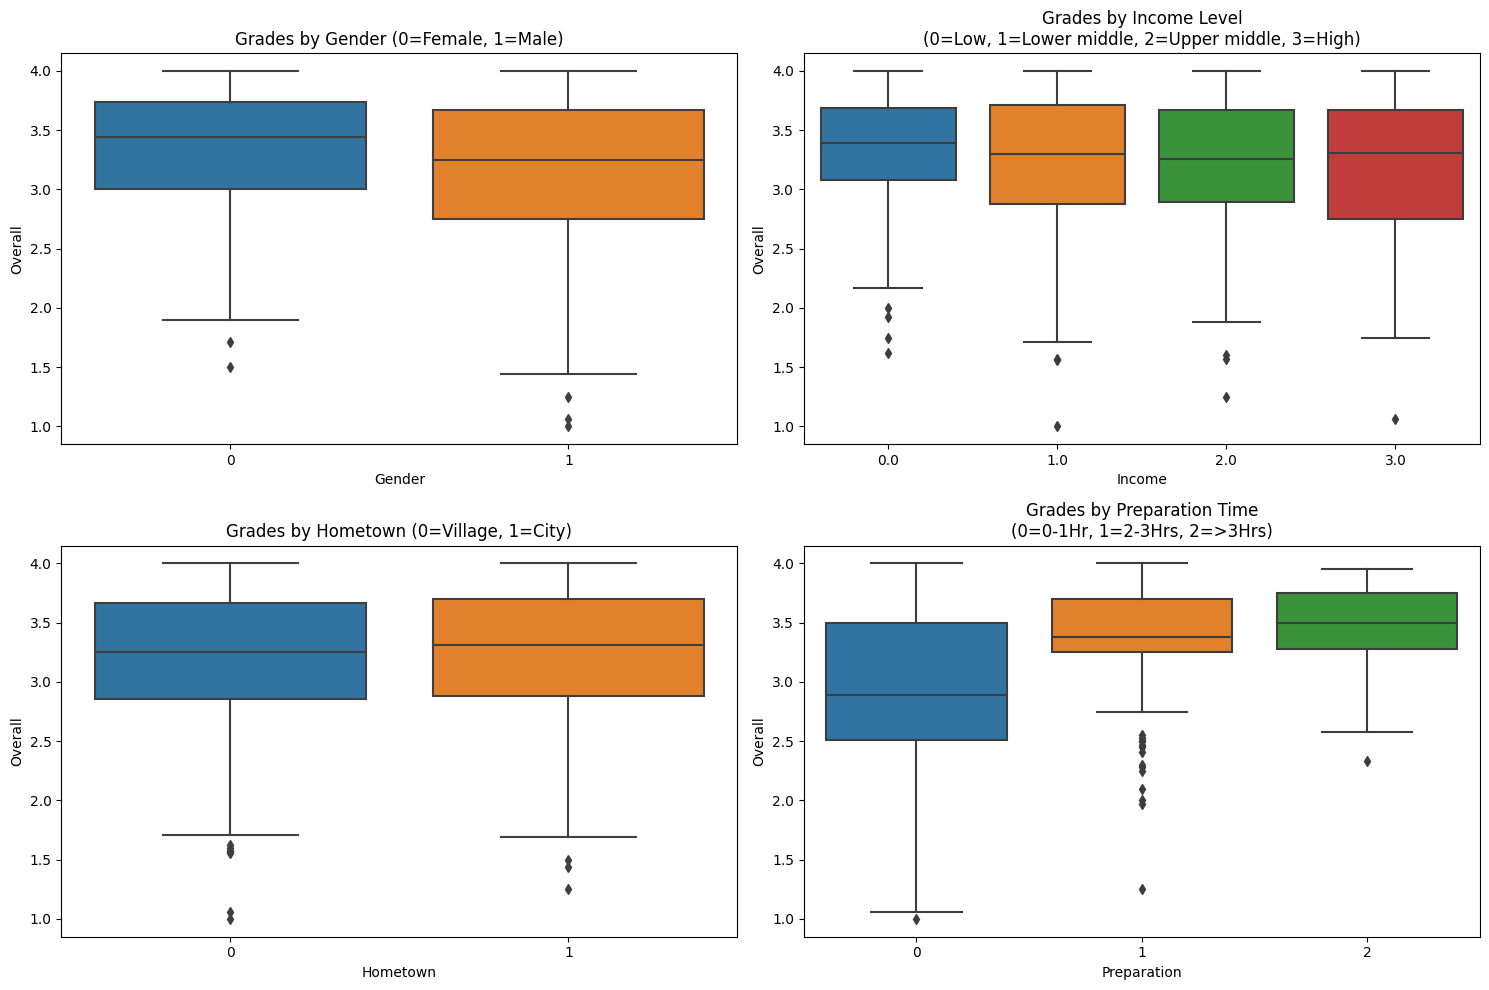

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with multiple subplots
plt.figure(figsize=(15, 10))

# 1. Overall grades by Gender
plt.subplot(2, 2, 1)
sns.boxplot(x='Gender', y='Overall', data=df_encoded)
plt.title('Grades by Gender (0=Female, 1=Male)')

# 2. Overall grades by Income Level
plt.subplot(2, 2, 2)
sns.boxplot(x='Income', y='Overall', data=df_encoded)
plt.title('Grades by Income Level\n(0=Low, 1=Lower middle, 2=Upper middle, 3=High)')

# 3. Overall grades by Hometown
plt.subplot(2, 2, 3)
sns.boxplot(x='Hometown', y='Overall', data=df_encoded)
plt.title('Grades by Hometown (0=Village, 1=City)')

# 4. Overall grades by Preparation Time
plt.subplot(2, 2, 4)
sns.boxplot(x='Preparation', y='Overall', data=df_encoded)
plt.title('Grades by Preparation Time\n(0=0-1Hr, 1=2-3Hrs, 2=>3Hrs)')

plt.tight_layout()
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare features (X) and target (y)
# Excluding 'Department' (categorical) and 'Last' (too similar to Overall)
features = ['Gender', 'HSC', 'SSC', 'Income', 'Hometown', 'Computer', 
           'Preparation', 'Gaming', 'Attendance', 'Job', 'English', 
           'Extra', 'Semester']

X = df_encoded[features]
y = df_encoded['Overall']

# Create and fit model
model = LinearRegression()
model.fit(X, y)

# Create feature importance dataframe
importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=True)

# Create bar plot
plt.figure(figsize=(12, 8))
bars = sns.barplot(data=importance_df, y='Feature', x='Coefficient')

# Add value labels
for i, bar in enumerate(bars.patches):
    width = bar.get_width()
    plt.text(width, i, f'{width:.3f}', 
             ha='left' if width >= 0 else 'right',
             va='center', fontsize=10)

plt.title('Impact of Background Factors on Overall Grade\nPositive values indicate positive effect on grades')
plt.xlabel('Effect on Overall Grade')
plt.ylabel('Background Factors')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.2)

plt.tight_layout()
plt.show()

ValueError: could not convert string to float: '6th'

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Semester to numeric (remove 'th', 'rd', etc.)
df_encoded['Semester'] = df_encoded['Semester'].str.extract('(\d+)').astype(int)

# Prepare features (X) and target (y)
features = ['Gender', 'HSC', 'SSC', 'Income', 'Hometown', 'Computer', 
           'Preparation', 'Gaming', 'Attendance', 'Job', 'English', 
           'Extra', 'Semester']

X = df_encoded[features]
y = df_encoded['Overall']

# Create and fit model
model = LinearRegression()
model.fit(X, y)

# Create feature importance dataframe
importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=True)

# Create bar plot
plt.figure(figsize=(12, 8))
bars = sns.barplot(data=importance_df, y='Feature', x='Coefficient')

# Add value labels
for i, bar in enumerate(bars.patches):
    width = bar.get_width()
    plt.text(width, i, f'{width:.3f}', 
             ha='left' if width >= 0 else 'right',
             va='center', fontsize=10)

plt.title('Impact of Background Factors on Overall Grade\nPositive values indicate positive effect on grades')
plt.xlabel('Effect on Overall Grade')
plt.ylabel('Background Factors')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.2)

plt.tight_layout()
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert Semester to numeric
df_encoded['Semester'] = df_encoded['Semester'].str.extract('(\d+)').astype(int)

# Check for infinite values and NaN
print("Columns with NaN values:")
print(df_encoded[features].isna().sum())

# Clean the data
# Replace infinite values with NaN
df_clean = df_encoded.replace([np.inf, -np.inf], np.nan)
# Drop rows with NaN values
df_clean = df_clean.dropna()

# Prepare features (X) and target (y)
features = ['Gender', 'HSC', 'SSC', 'Income', 'Hometown', 'Computer', 
           'Preparation', 'Gaming', 'Attendance', 'Job', 'English', 
           'Extra', 'Semester']

X = df_clean[features]
y = df_clean['Overall']

# Create and fit model
model = LinearRegression()
model.fit(X, y)

# Create feature importance dataframe
importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=True)

# Create bar plot
plt.figure(figsize=(12, 8))
bars = sns.barplot(data=importance_df, y='Feature', x='Coefficient')

# Add value labels
for i, bar in enumerate(bars.patches):
    width = bar.get_width()
    plt.text(width, i, f'{width:.3f}', 
             ha='left' if width >= 0 else 'right',
             va='center', fontsize=10)

plt.title('Impact of Background Factors on Overall Grade\nPositive values indicate positive effect on grades')
plt.xlabel('Effect on Overall Grade')
plt.ylabel('Background Factors')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.2)

plt.tight_layout()
plt.show()

AttributeError: Can only use .str accessor with string values!

In [28]:
# First, let's see what we have
print("Data types before cleaning:")
print(df_encoded.dtypes)

# Convert Semester to numeric (in a safer way)
df_encoded['Semester'] = pd.to_numeric(df_encoded['Semester'].astype(str).str.extract('(\d+)')[0])

# Prepare features (X) and target (y)
features = ['Gender', 'HSC', 'SSC', 'Income', 'Hometown', 'Computer', 
           'Preparation', 'Gaming', 'Attendance', 'Job', 'English', 
           'Extra', 'Semester']

X = df_encoded[features]
y = df_encoded['Overall']

# Create and fit model
model = LinearRegression()
model.fit(X, y)

# Create feature importance dataframe
importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=True)

# Plot
plt.figure(figsize=(12, 8))
bars = sns.barplot(data=importance_df, y='Feature', x='Coefficient')

for i, bar in enumerate(bars.patches):
    width = bar.get_width()
    plt.text(width, i, f'{width:.3f}', 
             ha='left' if width >= 0 else 'right',
             va='center', fontsize=10)

plt.title('Impact of Background Factors on Overall Grade\nPositive values indicate positive effect on grades')
plt.xlabel('Effect on Overall Grade')
plt.ylabel('Background Factors')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.2)

plt.tight_layout()
plt.show()

Data types before cleaning:
Department      object
Gender           int32
HSC            float64
SSC            float64
Income         float64
Hometown         int32
Computer         int64
Preparation      int64
Gaming           int64
Attendance     float64
Job              int32
English          int64
Extra            int32
Semester         int32
Last           float64
Overall        float64
dtype: object


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [29]:
# Prepare features (X) and target (y)
features = ['Gender', 'HSC', 'SSC', 'Income', 'Hometown', 'Computer', 
           'Preparation', 'Gaming', 'Attendance', 'Job', 'English', 
           'Extra', 'Semester']

X = df_encoded[features]
y = df_encoded['Overall']

# Create and fit model
model = LinearRegression()
model.fit(X, y)

# Create feature importance dataframe with better labels
feature_labels = ['Gender (1=Male)', 'HSC Score', 'SSC Score', 'Income Level', 
                 'Hometown (1=City)', 'Computer Usage', 'Preparation Time',
                 'Gaming Time', 'Attendance Rate', 'Has Job', 'English Score',
                 'Extra Activities', 'Semester']

importance_df = pd.DataFrame({
    'Feature': feature_labels,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=True)

# Plot
plt.figure(figsize=(12, 8))
bars = sns.barplot(data=importance_df, y='Feature', x='Coefficient')

# Add value labels
for i, bar in enumerate(bars.patches):
    width = bar.get_width()
    plt.text(width, i, f'{width:.3f}', 
             ha='left' if width >= 0 else 'right',
             va='center', fontsize=10)

plt.title('Impact of Background Factors on Student Performance\nPositive values indicate positive effect on grades')
plt.xlabel('Effect on Overall Grade')
plt.ylabel('Background Factors')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.2)

plt.tight_layout()
plt.show()

# Print model performance
print(f"\nModel R-squared score: {model.score(X, y):.3f}")

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Columns with NaN or infinite values:
Income: NaN=57, Inf=0
Attendance: NaN=11, Inf=0


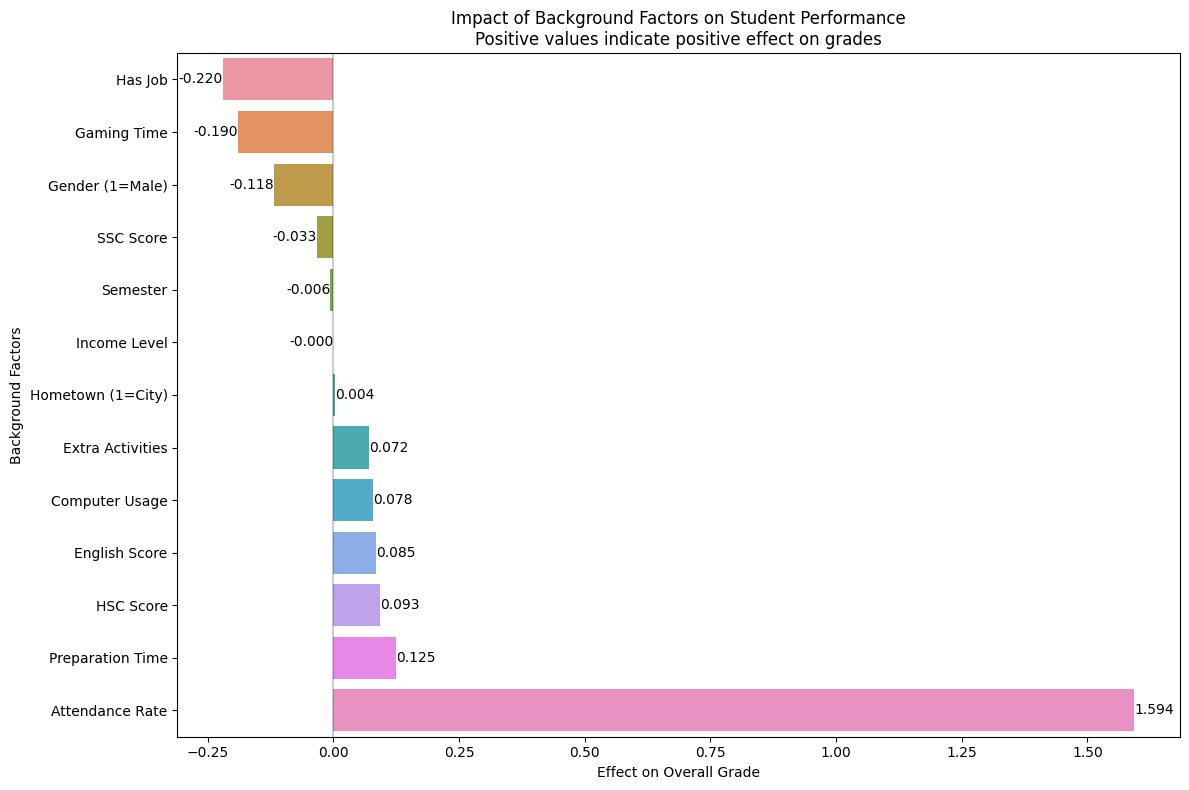

In [30]:
# Check for NaN or infinite values in each column
print("Columns with NaN or infinite values:")
for column in features:
    nan_count = df_encoded[column].isna().sum()
    inf_count = np.isinf(df_encoded[column]).sum()
    if nan_count > 0 or inf_count > 0:
        print(f"{column}: NaN={nan_count}, Inf={inf_count}")

# Clean the data
df_clean = df_encoded.copy()

# Replace infinite values with NaN
df_clean = df_clean.replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN values
df_clean = df_clean.dropna()

# Now proceed with the model
features = ['Gender', 'HSC', 'SSC', 'Income', 'Hometown', 'Computer', 
           'Preparation', 'Gaming', 'Attendance', 'Job', 'English', 
           'Extra', 'Semester']

X = df_clean[features]
y = df_clean['Overall']

# Create and fit model
model = LinearRegression()
model.fit(X, y)

# Create feature importance visualization
feature_labels = ['Gender (1=Male)', 'HSC Score', 'SSC Score', 'Income Level', 
                 'Hometown (1=City)', 'Computer Usage', 'Preparation Time',
                 'Gaming Time', 'Attendance Rate', 'Has Job', 'English Score',
                 'Extra Activities', 'Semester']

importance_df = pd.DataFrame({
    'Feature': feature_labels,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=True)

plt.figure(figsize=(12, 8))
bars = sns.barplot(data=importance_df, y='Feature', x='Coefficient')

for i, bar in enumerate(bars.patches):
    width = bar.get_width()
    plt.text(width, i, f'{width:.3f}', 
             ha='left' if width >= 0 else 'right',
             va='center', fontsize=10)

plt.title('Impact of Background Factors on Student Performance\nPositive values indicate positive effect on grades')
plt.xlabel('Effect on Overall Grade')
plt.ylabel('Background Factors')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.2)

plt.tight_layout()
plt.show()

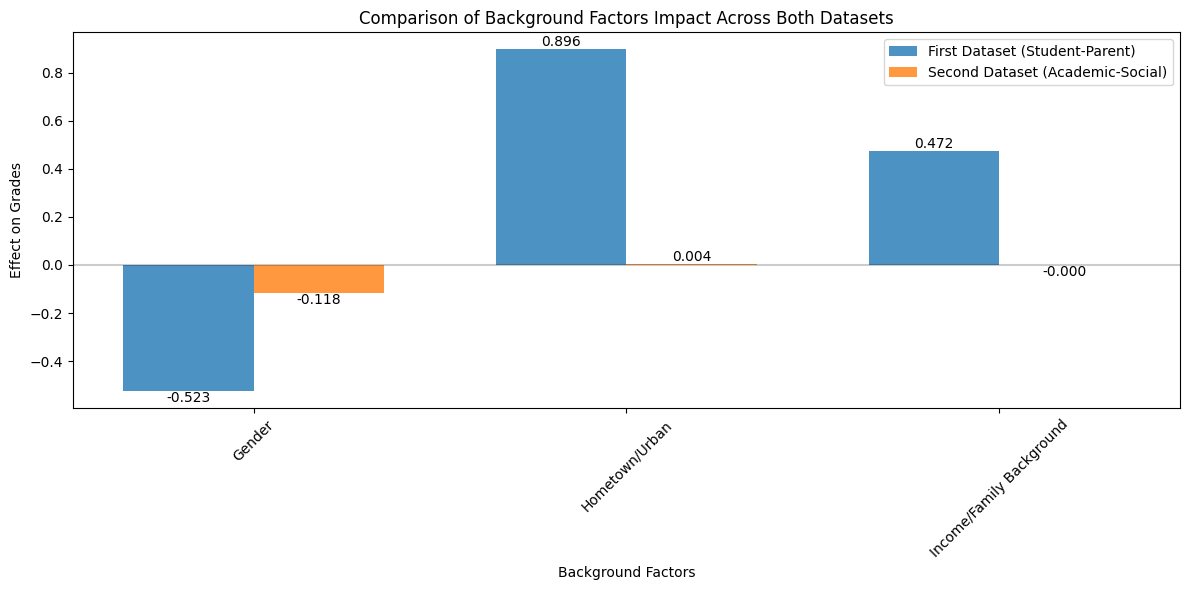

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define common features and their coefficients from both datasets
comparison_data = {
    'Feature': ['Gender', 'Hometown/Urban', 'Income/Family Background'],
    'First Dataset': [-0.523, 0.896, 0.472],  # From previous analysis (parents' education as family background)
    'Second Dataset': [-0.118, 0.004, -0.000]  # From current analysis
}

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Create grouped bar plot
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = np.arange(len(comparison_data['Feature']))

plt.bar(x - bar_width/2, comparison_df['First Dataset'], bar_width, label='First Dataset (Student-Parent)', alpha=0.8)
plt.bar(x + bar_width/2, comparison_df['Second Dataset'], bar_width, label='Second Dataset (Academic-Social)', alpha=0.8)

# Customize plot
plt.xlabel('Background Factors')
plt.ylabel('Effect on Grades')
plt.title('Comparison of Background Factors Impact Across Both Datasets')
plt.xticks(x, comparison_df['Feature'], rotation=45)
plt.legend()

# Add value labels
for i, v1, v2 in zip(x, comparison_df['First Dataset'], comparison_df['Second Dataset']):
    plt.text(i - bar_width/2, v1, f'{v1:.3f}', ha='center', va='bottom' if v1 > 0 else 'top')
    plt.text(i + bar_width/2, v2, f'{v2:.3f}', ha='center', va='bottom' if v2 > 0 else 'top')

plt.axhline(y=0, color='black', linestyle='-', alpha=0.2)
plt.tight_layout()
plt.show()